1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-life $\tau$ of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

Text(0.5, 1.0, 'number of Tl and Pb atoms as function of time')

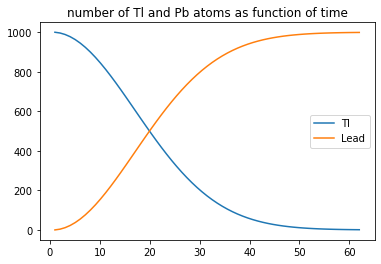

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def p(t):
    T = 3.052*60
    return 1 - 2**(-t/T) 

#List of number of Tl
tl = []
#List of number of Pb
pb = []
#Time 
t = 1

# Add the values at t=0
tl.append(1000)
pb.append(0)

#At each time-step decide whether each Tl atom has decayed or no
while pb[t-1] < 999 :
    decay = tl[t-1]*p(t)
    tl.append(tl[t-1] - decay)
    pb.append(pb[t-1] + decay)    
    t = t + 1

#Plot the evolution of the two sets as a function of time
time = np.linspace(1, len(pb)+1, len(pb))
plt.plot(time,tl, label = 'Tl')
plt.plot(time,pb, label = 'Lead')
plt.legend()
plt.title("number of Tl and Pb atoms as function of time")

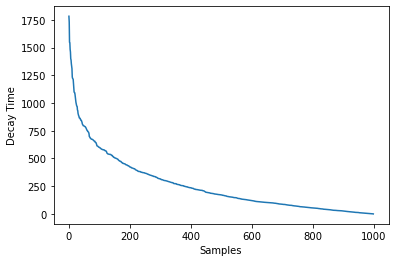

In [6]:
def p2(t):
    T = 3.052*60
    return -T*np.log(1-t)/np.log(2)

decay_t = p2(np.random.random(1000))
plt.plot(np.sort(decay_t)[::-1])
plt.xlabel('Samples')
plt.ylabel('Decay Time')
plt.show()


2\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function: 

$$f(x) =\sin^2{\left( \frac{1}{1-x} \right)}$$

* Plot the function and compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate (hint: repeat the integral $N$ times, and from the distribution of the integrals take the mean value and the standard deviation, the latter rescaled by the appropriate factor)
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one.

hit/miss : mean : 1.314
mean value : mean : 1.3442548565423709


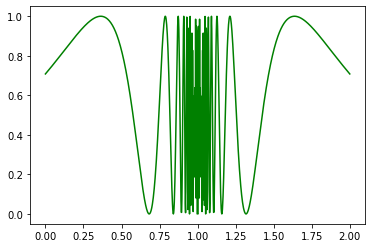

In [13]:
def f(x):
    return np.sin(1/(1-x))**2

N = 1000
x = np.linspace(0, 2, N)
plt.plot(x, f(x), 'g-')

# Monte Carlo integration hit/miss
count = 0
for i in range(N):
    x = 2*np.random.random()
    y = np.random.random()
    if y < f(x): 
        count += 1
I_1 = 2*count/N
print("hit/miss : mean :",I_1)

# Monte Carlo integration mean value

x = np.linspace(0, 2, N)


I_2 = (2/N )*np.sum(f(x))
print("mean value : mean :",I_2)



3\. **Monte Carlo integration in high dimension**

* Compute the area of a circle of unit radius, by integrating the function:

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere.

In [33]:
def f(params):
    sol = 0
    for p in params:
        sol += p**2
    if sol <= 1:
        return 1
    else:
        return 0
    
N = 1000000
count = 0

for i in range(N):
    x = np.random.random()
    y = np.random.random()
    
    if f([x,y]): 
        count += 1
        
I_1 = 4 * (count / N)
print("circle:", I_1)

dim = 10 
count = 0
a = -1
b = 1

for i in range(N):
    params = []
    for i in range(dim):
        params.append(np.random.random())
    
    if (f_2(params)):
        count += 1
        
I_2 = 2**dim*count/N

print("10D volume:", I_2)


circle: 3.140044
10D volume: 2.501632


4\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should expect a result around 0.84.

In [41]:
def w(x):
    return 1/np.sqrt(x)

def f(x):
    return (x**(-1/2))/(np.exp(x) + 1)

N=10000

x = np.random.random(N)**2
I = 1 / N * np.sum(f(x)/w(x)) * 2
print("Integral :", I)

Integral : 0.8405967014833159
